# 1. IMPORTANDO BIBLIOTECAS

In [84]:
# !pip install dataframe-image

In [85]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as di

In [86]:
#definindo tamanho da fonte para os graficos
plt.rcParams.update({'font.size':14})

# 2. FAZENDO A LEITURA DO ARQUIVO DE DADOS

In [87]:
#Leitura do arquivo
df = pd.read_excel("datasets/gravimetria_rsu_usina_sjb.xlsx")

In [88]:
#Exibindo as municipios do CMM
df.head(7)

,CD_MUN,Cidade,Ano,Latitude,Longitude,Populacao,Valor Bruto RSU (ton/dia),Kg.hab.dia,Cobranca,Matéria orgânica,...,Fraldas e papel higiênico,Alumínio,Diversos,Borrachas,Papel branco,Espumas,Subtotal,Perdas do processo,TOTAL,Umidade
0,3517703,Guará,2021,-20.429380,-47.824827,20626,14.32,0.694269,Sim,0.405,...,0.141,0.006,0.017,0.006,0.031,0.004,0.996,0.004,1,0.202
1,3521309,Ipuâ,2021,-20.447951,-48.014793,15917,10.88,0.683546,Sim,0.392,...,0.166,0.005,0.018,0.005,0.033,0.004,0.997,0.003,1,0.191
2,3536307,Patrocinio Paulista,2021,-20.641255,-47.281866,11958,8.21,0.686570,Sim,0.411,...,0.151,0.007,0.015,0.006,0.031,0.001,0.994,0.006,1,0.205
3,3543105,Ribeirão Corrente,2021,-20.458270,-47.589949,3778,2.61,0.690842,Sim,0.416,...,0.161,0.005,0.015,0.005,0.032,0.005,0.996,0.004,1,0.235
4,3544905,Sales Oliveira,2021,-20.771135,-47.839645,10864,7.47,0.687592,Sim,0.387,...,0.168,0.004,0.017,0.006,0.032,0.002,0.995,0.005,1,0.185
5,3549409,São Joaquim da Barra,2021,-20.577498,-47.876527,51382,40.42,0.786657,Sim,0.422,...,0.142,0.007,0.016,0.007,0.033,0.004,0.995,0.006,1,0.241
6,3549508,São José da Bela Vista,2021,-20.598759,-47.641875,7979,5.54,0.694323,Sim,0.389,...,0.156,0.007,0.018,0.006,0.034,0.002,0.995,0.005,1,0.172


In [89]:
di.export(df, 'imagens/tabelas/dfgeral.png', max_cols=20)

In [90]:
df['Matéria orgânica'] = (df['Matéria orgânica']) 
df['Texteis, couros, borracha'] = (df['Trapos e panos'] + df['Borrachas']) 
df['Metais'] = (df['Metais ferrosos']) 
df['Vidro'] = (df['Vidros']) 
df['Plasticos'] = (df['PET'] + df['PEAD'] + df['PVC'] + df['PEBD'] + df['PP'] + df['PS'] + df['Outros plásticos']) 
df['Papel e papelão'] = (df['Papelão e jornal'] + df['Papel branco']) 
df['Embalagens multimarcas'] = (df['Embalagem longa vida']) 
df['Rejeitos'] = (df['Fraldas e papel higiênico'] + df['Terra e pedra'] + df['Pilhas e baterias']) 
df['Outros'] = (df['Diversos']) 

rsu_cmm = df[['Cidade', 'Matéria orgânica', 'Texteis, couros, borracha', 'Metais', 'Vidro', 'Plasticos', 'Papel e papelão', 'Embalagens multimarcas', 'Rejeitos', 'Outros']]

In [91]:
#Salva o Dataframe da gravimetria dos RSU em arquivo
rsu_cmm.to_excel("datasets/gravimetria_rsu_cmm_2021.xlsx")

In [92]:
#Visualizando somente cidades e total de tonelada
cid_ton = df[['Cidade', 'Valor Bruto RSU (ton/dia)']]
cid_ton.head(7)
cid_ton.to_excel("datasets/rsu_ton_cidades.xlsx")

In [93]:
df_ton = pd.read_excel("datasets/rsu_ton_cidades.xlsx")
di.export(df_ton, 'imagens/tabelas/rsu_ton_cidades.png', max_cols=20)

In [94]:
#Mostraando o tipo de dados 
df.dtypes

CD_MUN                         int64
Cidade                        object
Ano                            int64
Latitude                     float64
Longitude                    float64
Populacao                      int64
Valor Bruto RSU (ton/dia)    float64
Kg.hab.dia                   float64
Cobranca                      object
Matéria orgânica             float64
Reciclaveis                  float64
Rejeito                      float64
Papelão e jornal             float64
Embalagem longa vida         float64
Isopor                       float64
PET                          float64
Vidros                       float64
PEAD                         float64
PVC                          float64
PEBD                         float64
PP                           float64
PS                           float64
Outros plásticos             float64
Metais ferrosos              float64
Pilhas e baterias            float64
Terra e pedra                float64
Madeira                      float64
T

In [95]:
cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']
colors_blue = ['#8AA3CC', '#668DC2', '#4C7DB7', '#4774AB', '#416C9F', '#3A6190', '#33567F']
colors_rsu = ['#F58220', '#555A69', '#A5C8D0', '#2692D1', '#01976C', '#FDBA4D', '#24333E', '#B1B4B6', '#C25228']
ton = df["Valor Bruto RSU (ton/dia)"]
kg = df["Kg.hab.dia"]
cidades = df["Cidade"]

organicos = (df["Matéria orgânica"].sum() / 7) * 100
reciclaveis = (df['Texteis, couros, borracha'] + df['Metais'] + df['Vidro'] + df['Plasticos'] + df['Papel e papelão'] + df['Embalagens multimarcas'] / 7) * 100
rejeitos = (df["Rejeitos"].sum() / 7) * 100

explode = [0, 0, 0, 0, 0, 0, 0]

In [96]:
organicos

40.31428571428572

In [97]:
reciclaveis

0    32.500000
1    32.671429
2    32.471429
3    30.742857
4    33.085714
5    31.814286
6    33.457143
dtype: float64

In [98]:
rejeitos

20.25714285714286

In [99]:
#Peso Bruto em tonelada
df['Valor Bruto RSU (ton/dia)'].value_counts().head(7)

14.32    1
10.88    1
8.21     1
2.61     1
7.47     1
40.42    1
5.54     1
Name: Valor Bruto RSU (ton/dia), dtype: int64

# 3. VALORES DE GRAVIMETRIA DOS RSU NO BRASIL - 2020

In [100]:
rsu_cmm.head(7)

,Cidade,Matéria orgânica,"Texteis, couros, borracha",Metais,Vidro,Plasticos,Papel e papelão,Embalagens multimarcas,Rejeitos,Outros
0,Guará,0.405,0.032,0.013,0.025,0.111,0.142,0.014,0.193,0.017
1,Ipuâ,0.392,0.030,0.014,0.024,0.115,0.141,0.019,0.210,0.018
2,Patrocinio Paulista,0.411,0.037,0.014,0.029,0.111,0.131,0.019,0.195,0.015
3,Ribeirão Corrente,0.416,0.035,0.012,0.026,0.112,0.120,0.017,0.210,0.015
4,Sales Oliveira,0.387,0.034,0.016,0.023,0.114,0.141,0.020,0.214,0.017
5,São Joaquim da Barra,0.422,0.028,0.011,0.025,0.099,0.153,0.015,0.191,0.016
6,São José da Bela Vista,0.389,0.043,0.014,0.028,0.116,0.131,0.018,0.205,0.018


In [101]:
data = [45.3, 14.1, 1.4, 10.4, 16.8, 2.7, 2.3, 5.6, 1.4] 
data

[45.3, 14.1, 1.4, 10.4, 16.8, 2.7, 2.3, 5.6, 1.4]

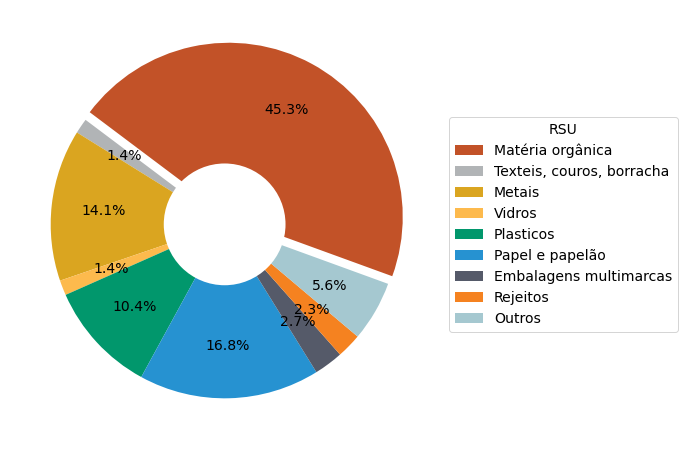

In [102]:
# grafico gravimetria rsu brasil 2020
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))


rsu_tipos = ['Matéria orgânica', 
             'Texteis, couros, borracha', 
             'Metais', 'Vidros', 
             'Plasticos', 
             'Papel e papelão', 
             'Embalagens multimarcas', 
             'Rejeitos', 'Outros'
            ]
colors_rsu = ['#C25228', 
              '#B1B4B6', 
              '#DAA520', 
              '#FDBA4D', 
              '#01976C', 
              '#2692D1', 
              '#555A69', 
              '#F58220', 
              '#A5C8D0' ]
data = [45.3, 1.4, 14.1, 1.4, 10.4, 16.8, 2.7, 2.3, 5.6] 
explode = [0.05, 0, 0, 0, 0, 0, 0, 0, 0]


wedges, texts, autotexts = ax.pie(data, 
                                  autopct='%1.1f%%', 
                                  colors=colors_rsu, 
                                  explode=explode,
                                  pctdistance=0.70,
                                  textprops = dict(color="black"),
                                  startangle=340,
                                  labeldistance = 1.2,
                                 )

# draw circle
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


ax.legend(wedges, rsu_tipos,
          title="RSU",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1),
          
         )

plt.setp(autotexts, size=14, weight="normal")

plt.savefig('imagens/graficos/gravimetria-rsu-brasil.png', dpi=600, bbox_inches='tight')

plt.show()

In [103]:
rsu_cmm.head(9)
coluna1 = (rsu_cmm['Matéria orgânica'].sum() / 7) * 100
coluna2 = (rsu_cmm['Texteis, couros, borracha'].sum() / 7) * 100
coluna3 = (rsu_cmm['Metais'].sum() / 7) * 100
coluna4 = (rsu_cmm['Vidro'].sum() / 7) * 100
coluna5 = (rsu_cmm['Plasticos'].sum() / 7) * 100
coluna6 = (rsu_cmm['Papel e papelão'].sum() / 7) * 100
coluna7 = (rsu_cmm['Embalagens multimarcas'].sum() / 7) * 100
coluna8 = (rsu_cmm['Rejeitos'].sum() / 7) * 100
coluna9 = (rsu_cmm['Outros'].sum() / 7) * 100

# organicos = coluna1
# reciclaveis = coluna2 + coluna3 + coluna4 + coluna5 + coluna6 + coluna7 + coluna9
# rejeitos = coluna8              


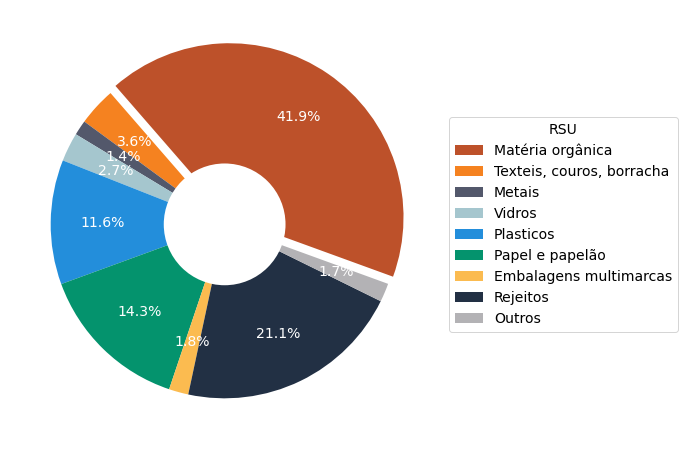

In [104]:
# grafico gravimetria rsu brasil 2020
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))


rsu_tipos = ['Matéria orgânica', 
             'Texteis, couros, borracha', 
             'Metais', 
             'Vidros', 
             'Plasticos', 
             'Papel e papelão', 
             'Embalagens multimarcas', 
             'Rejeitos', 
             'Outros'
            ]
colors_rsu = ['#BD512A', 
              '#F58220', 
              '#53586B',
              '#A5C6CE',
              '#238EDB', 
              '#04936D', 
              '#FBBB50', 
              '#223044',
              '#B3B2B5', 
             ]
# data = [40.31, 3.41, 1.34, 2.57, 11.11, 13.70, 1.74, 20.26, 1.66] 
data = [
    coluna1, 
    coluna2, 
    coluna3, 
    coluna4, 
    coluna5, 
    coluna6, 
    coluna7, 
    coluna8, 
    coluna9 
    ] 

explode = [0.05, 0, 0, 0, 0, 0, 0, 0, 0]

wedges, texts, autotexts = ax.pie(data, 
                                  autopct='%1.1f%%', 
                                  colors=colors_rsu, 
                                  explode=explode,
                                  pctdistance=0.70,
                                  textprops = dict(color="w"),
                                  startangle=340,
                                  labeldistance = 1.2,
                                 )

centre_circle = plt.Circle((0, 0), 0.35, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)

ax.legend(wedges, rsu_tipos,
          title="RSU",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1),
          
         )

plt.setp(autotexts, size=14, weight="normal")

plt.savefig('imagens/graficos/gravimetria-rsu-cmm.png', dpi=600, bbox_inches='tight')

plt.show()

# 4. VALORES ORGANICOS, RECICLAVEIS E REJEITOS

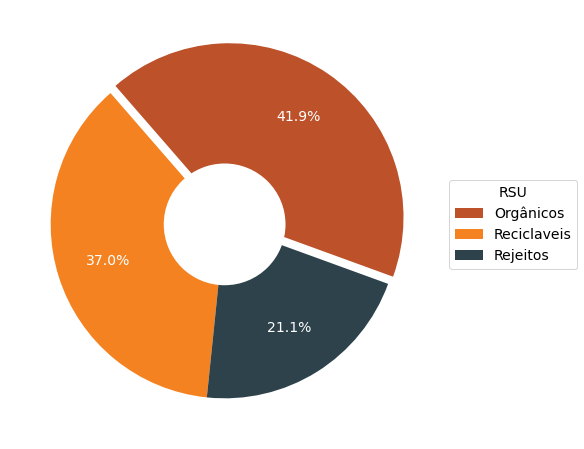

In [105]:
# grafico gravimetria rsu brasil 2020
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))


rsu_tipos = ['Orgânicos', 
             'Reciclaveis', 
             'Rejeitos' 
            ]
colors_rsu = ['#BD512A', 
              '#F58220', 
              '#2D424B'
             ]


organicos = coluna1
reciclaveis = coluna2 + coluna3 + coluna4 + coluna5 + coluna6 + coluna7 + coluna9
rejeitos = coluna8              
              
data = [
    organicos,
    reciclaveis,
    rejeitos
    ] 

explode = [0.05, 0, 0]

wedges, texts, autotexts = ax.pie(data, 
                                  autopct='%1.1f%%', 
                                  colors=colors_rsu, 
                                  explode=explode,
                                  pctdistance=0.70,
                                  textprops = dict(color="w"),
                                  startangle=340,
                                  labeldistance = 1.2,
                                 )

centre_circle = plt.Circle((0, 0), 0.35, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)

ax.legend(wedges, rsu_tipos,
          title="RSU",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1)
         )

plt.setp(autotexts, size=14, weight="normal")

plt.savefig('imagens/graficos/grafico-categorias-rosca-cmm.png', dpi=600, bbox_inches='tight')

plt.show()

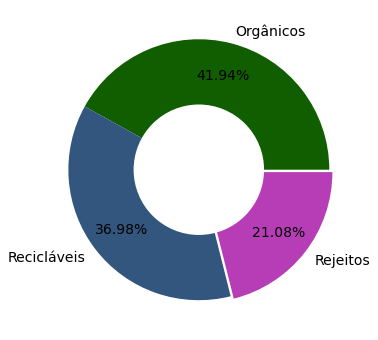

In [106]:
# Criando nosso conjunto de dados
labels='Orgânicos','Recicláveis','Rejeitos'
sizes=[organicos,reciclaveis,rejeitos]

explode = (0, 0, 0.03)
fig, ax = plt.subplots(figsize=(12, 6))
  
plt.pie(sizes, 
        colors=['#105E00','#33567F','#B73DB6'], 
        labels=labels,
        autopct='%1.2f%%', 
        pctdistance=0.75,
        textprops=dict(color="black"),
        explode=explode)

plt.setp(autotexts, size=22, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


  
# Adding Title of chart
#plt.title('Total Tonelada/dia por Município')

# Salva imagem do gráfico
plt.savefig('imagens/graficos/porcentagem-tipos-rosca-green.png', dpi=600, bbox_inches='tight')

plt.show() 

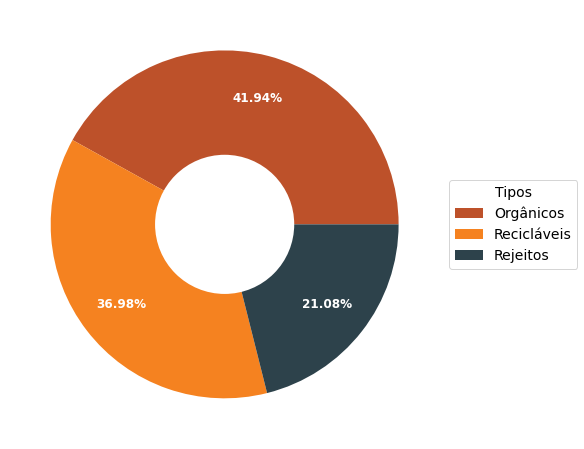

In [107]:
#importar a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))


labels='Orgânicos','Recicláveis','Rejeitos'
sizes=[organicos,reciclaveis,rejeitos]
data = kg

wedges, texts, autotexts = ax.pie(sizes, 
                                  autopct='%1.2f%%', 
                                  pctdistance=0.75,
                                  textprops=dict(color="w"),
                                  colors=colors_rsu,
                                  explode = [0, 0, 0],
                                 )


ax.legend(wedges, labels,
          title="Tipos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

# ax.set_title('Gráfico de Kg/hab/dia por município')

  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-kg-dia-rosca.png', dpi=400, bbox_inches='tight')

plt.show()

# 5. TOTAL KG/DIA POR HABITANTE 

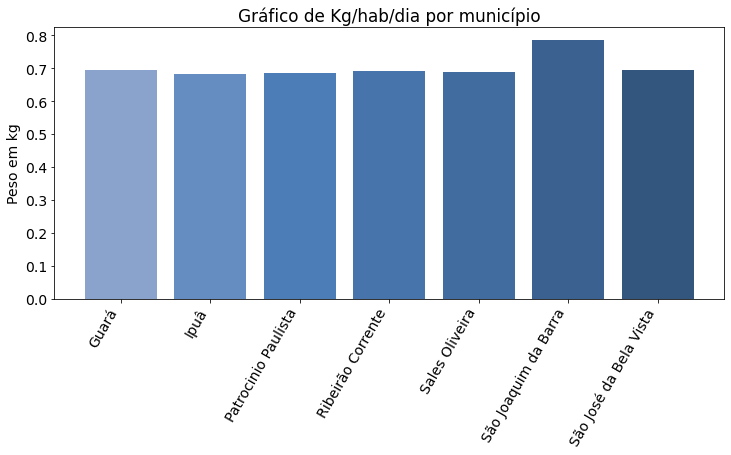

In [108]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(cidades, kg, color=colors_blue);
ax.set_title('Gráfico de Kg/hab/dia por município')
ax.set_ylabel('Peso em kg')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

#percentual = 0
#for i, x enumerate(percentual)
#   plt.text(i, x, f'{x}', ha='center',fontsize=' ')

# Salva imagem do gráfico
plt.savefig('imagens/graficos/kg-dia-hab-bar.png', dpi=600, bbox_inches='tight')

plt.show()

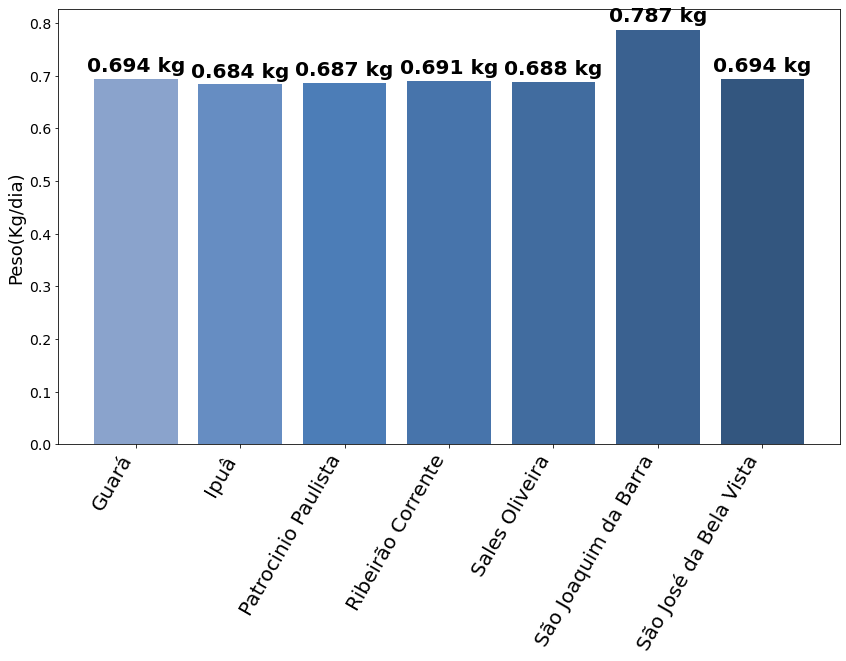

In [109]:
fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

# graph = ax.bar(cidades, variavel, width, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
graph = ax.bar(cidades, kg, color=colors_blue)
plt.ylabel('Peso(Kg/dia)', fontsize=18)

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=20,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             '{:1.3f} kg'.format(kg[i]),
             color='black',
             ha='center',
             fontsize='x-large',
             weight='bold')
    i+=1

plt.savefig('imagens/graficos/grafico-kg-dia-bar-porcentagem-topo.png', dpi=600, bbox_inches='tight')


plt.show()

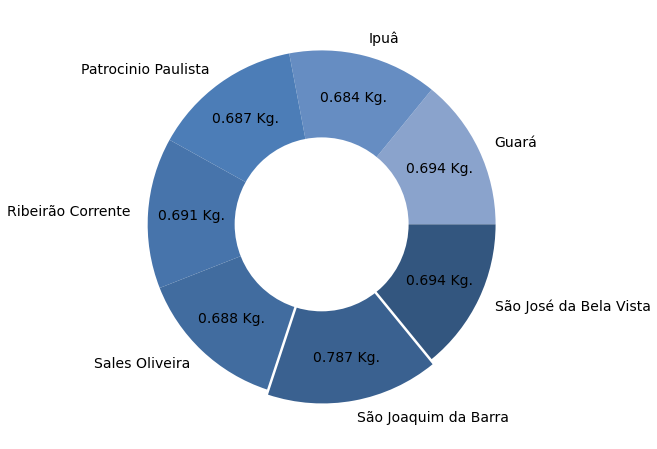

In [110]:
explode = (0, 0, 0, 0, 0, 0.03, 0)
fig, ax = plt.subplots(figsize=(16, 8))
  
plt.pie(kg, colors=colors_blue, labels=cidades,
        autopct=lambda v:f"{sum(kg)*v/100:.3f} Kg.", pctdistance=0.75,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
#plt.title('Total Tonelada/dia por Município')

# Salva imagem do gráfico
plt.savefig('imagens/graficos/kg-dia-hab-rosca-blue.png', dpi=600, bbox_inches='tight')

plt.show() 

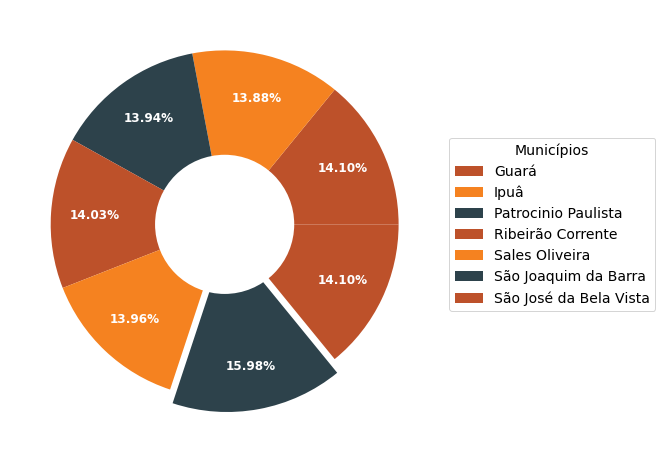

In [111]:
#importar a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = kg

wedges, texts, autotexts = ax.pie(kg, 
                                  # autopct=lambda v:f"{sum(kg)*v/100:.3f} Kg.", 
                                  autopct='%1.2f%%', 
                                  pctdistance=0.75,
                                  textprops=dict(color="w"),
                                  colors=colors_rsu,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

# ax.set_title('Gráfico de Kg/hab/dia por município')

  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-kg-dia-rosca.png', dpi=400, bbox_inches='tight')

plt.show()

# 6. TOTAL TONELADA/DIA POR MUNICÍPIO

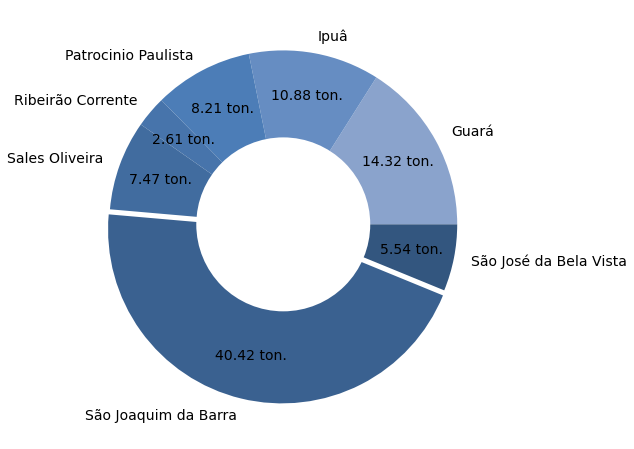

In [112]:
explode = (0, 0, 0, 0, 0, 0.03, 0)
fig, ax = plt.subplots(figsize=(16, 8))
  
# Pie Chart
#plt.pie(ton, colors=colors_green, labels=cidades,
#        autopct='%1.2f%%', pctdistance=0.75,
#        explode=variavel)

plt.pie(ton, colors=colors_blue, labels=cidades,
        autopct=lambda v:f"{sum(ton)*v/100:.2f} ton.", pctdistance=0.75,
        explode=explode)

  
# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
#plt.title('Total Tonelada/dia por Município')

# Salva imagem do gráfico
plt.savefig('imagens/graficos/toneladas-total-rosca-blue.png', dpi=600, bbox_inches='tight')

plt.show() 

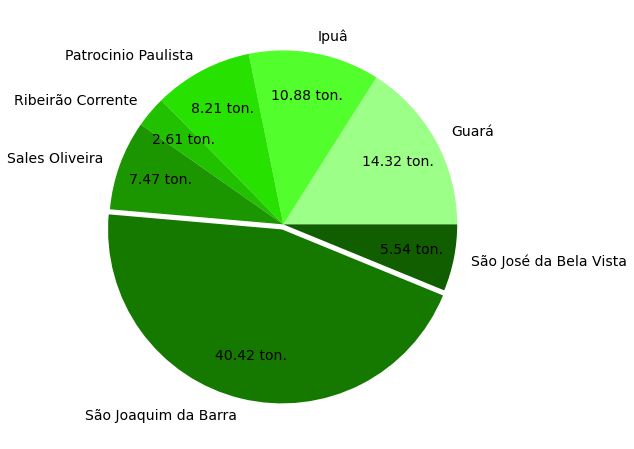

In [113]:
# explosion
explode = (0, 0, 0, 0, 0, 0.03, 0)

fig, ax = plt.subplots(figsize=(16, 8))
  
plt.pie(ton, 
        colors=colors_green, 
        labels=cidades,
        autopct=lambda v:f"{sum(ton)*v/100:.2f} ton.", 
        pctdistance=0.75,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 3), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
#plt.title('Total Tonelada/dia por Município')

# Salva imagem do gráfico
plt.savefig('imagens/graficos/toneladas-total-pie-green.png', dpi=600, bbox_inches='tight')
  
# Displaing Chart
plt.show() 

In [114]:
ton

0    14.32
1    10.88
2     8.21
3     2.61
4     7.47
5    40.42
6     5.54
Name: Valor Bruto RSU (ton/dia), dtype: float64

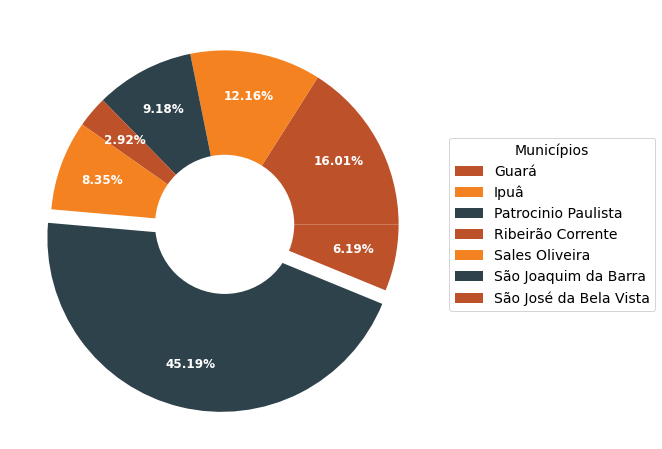

In [115]:
#importar a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(ton, 
                                  autopct='%1.2f%%', 
                                  pctdistance=0.75,
                                  textprops=dict(color="w"),
                                  colors=colors_rsu,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                 )

ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

# ax.set_title('Gráfico de Tonelada/dia por município')

  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-tonelada-total-rosca.png', dpi=400, bbox_inches='tight')

plt.show()

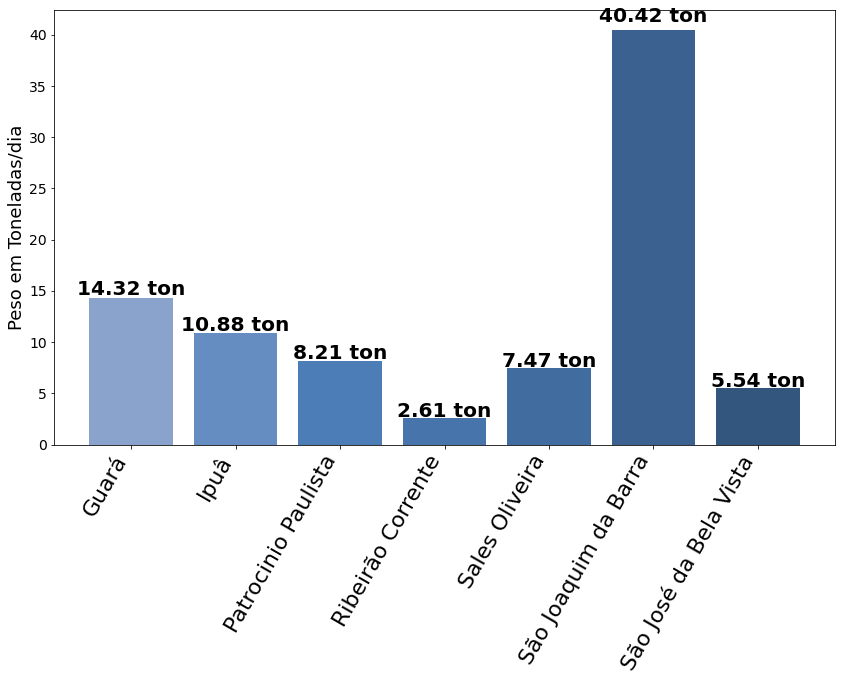

In [116]:
fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']
graph = ax.bar(cidades, ton, color=colors_blue)
plt.ylabel('Peso em Toneladas/dia', fontsize=18)

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=22,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             '{:1.2f} ton'.format(ton[i]),
             color='black',
             ha='center',
             fontsize='x-large',
             weight='bold')
    i+=1

#            '{:1.2f}%'.format(v/variavel[i]*100)

plt.savefig('imagens/graficos/grafico-toneladas-dia-bar-porcentagem-topo.png', dpi=600, bbox_inches='tight')


plt.show()

# 7. MEDIA TOTAL TONELADA/DIA DE ORGANICOS, RECICLÁVEIS E REJEITOS

## A) Total Geral

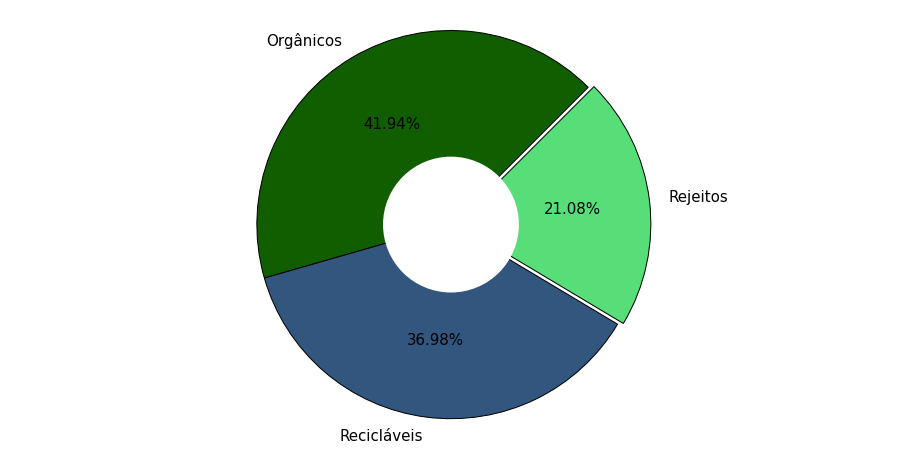

In [117]:
# Criando nosso conjunto de dados
labels='Orgânicos','Recicláveis','Rejeitos'
sizes=[organicos,reciclaveis,rejeitos]

#Estamos criando a representação, area de plotagem
fig1, ax1 = plt.subplots(figsize=(16, 8))

ax1.pie(sizes, 
        labels=labels, 
        colors=['#105E00','#33567F','#57DE79'], 
        autopct='%1.2f%%', 
        startangle=45,
        labeldistance = 1.1,
        explode = [0, 0, .03],
        wedgeprops = {"ec": "k"},
        textprops = {"fontsize": 15}
       )


# Com esa opção o gráfico ficará em circulo
ax1.axis('equal')

# draw circle
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Salva imagem do gráfico
plt.savefig('imagens/graficos/porcentagem-tipos-rosca.png', dpi=600, bbox_inches='tight')

# Mostra o grafico
plt.show()

## B) Total de tipos por municípios

In [118]:
# Lista os indices das cidades
tipos_rsu = df[['Matéria orgânica', 'Reciclaveis', 'Rejeito']]
for value in tipos_rsu:
    print(value)

Matéria orgânica
Reciclaveis
Rejeito


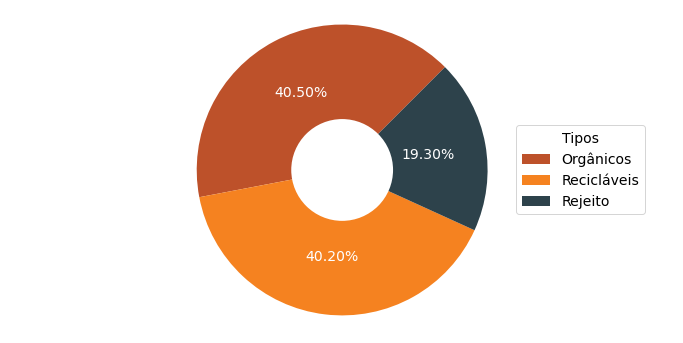

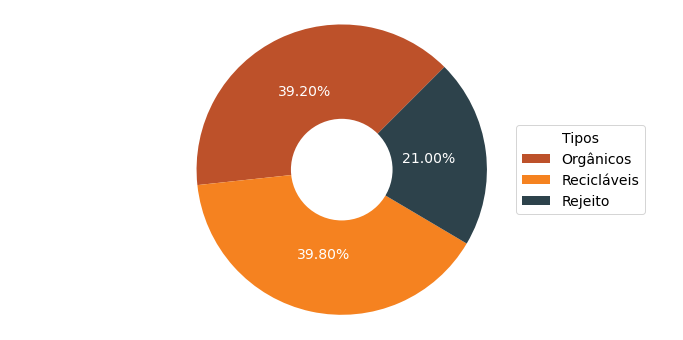

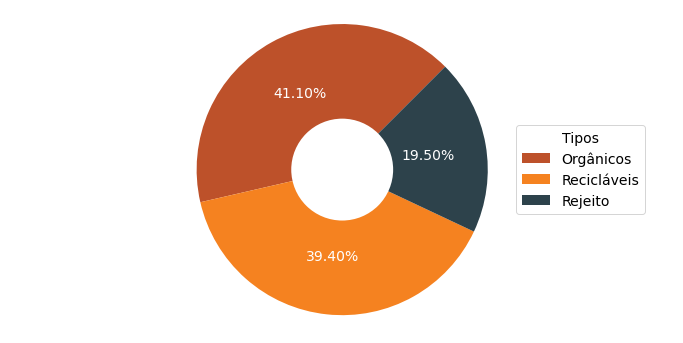

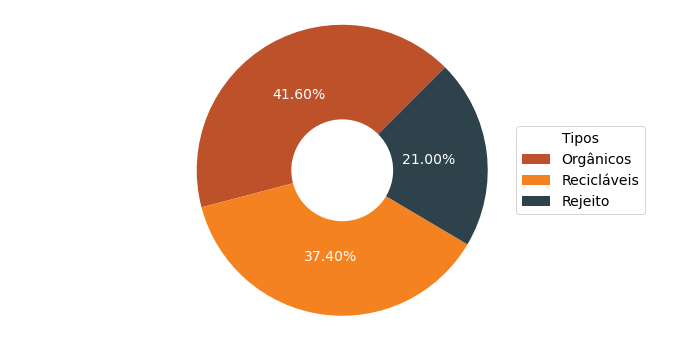

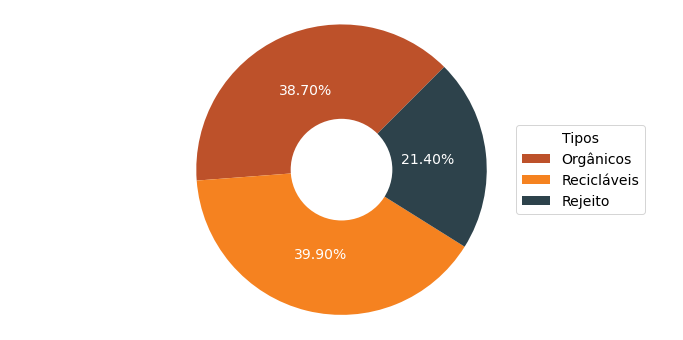

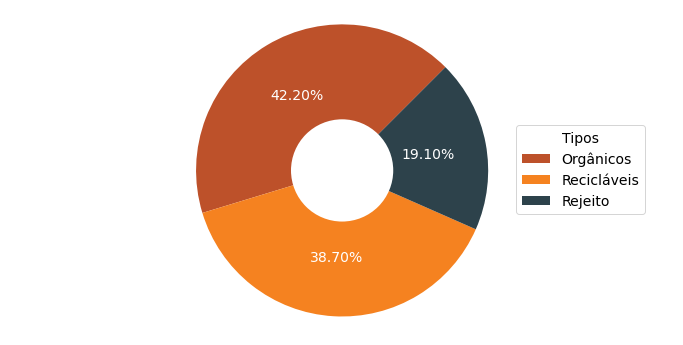

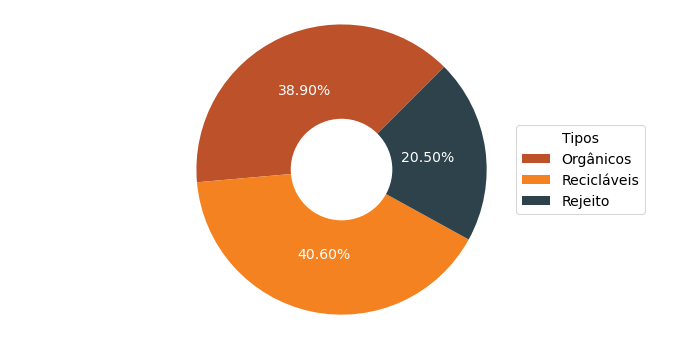

In [119]:
i = 0
tipos_rsu = df[['Matéria orgânica', 'Reciclaveis', 'Rejeito']]
for i in range(7):
    tipos = tipos_rsu.iloc[i] * 100
    
    # Criando nosso conjunto de dados
    labels='Orgânicos','Recicláveis','Rejeito'
    sizes=tipos

    #Estamos criando a representação, area de plotagem
    fig1, ax1 = plt.subplots(figsize=(12, 6))

    ax1.pie(sizes, 
        labels=labels, 
        # colors=['#105E00','#33567F','#57DE79'],
        colors=colors_rsu,
        autopct='%1.2f%%', 
        startangle=45,
        labeldistance = 1.1,
        explode = [0, 0, 0],
        textprops=dict(color="w")
        # wedgeprops = {"ec": "k"},
        # textprops = {"fontsize": 15}
       )


    # Com esa opção o gráfico ficará em circulo
    ax1.axis('equal')
    
    ax1.legend(wedges, labels,
              title="Tipos",
              loc="center left",
              bbox_to_anchor=(0.75, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.35, fc='white')
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)

    # plt.title(cidades[i])
    
    # Salva imagem do gráfico
    plt.savefig('imagens/graficos/porcentagem-tipos-rosca-' + cidades[i] + '.png', dpi=600, bbox_inches='tight')

    # Mostra o grafico
    plt.show()

# 8. TOTAL TONELADAS/DIA POR MATERIAL

## A) Total Geral

In [120]:
materiais = df[['Matéria orgânica', 'Metais ferrosos', 'Vidros', 'PET', 'Papelão e jornal', 'Embalagem longa vida', 'Trapos e panos']]
materiais

,Matéria orgânica,Metais ferrosos,Vidros,PET,Papelão e jornal,Embalagem longa vida,Trapos e panos
0,0.405,0.013,0.025,0.019,0.111,0.014,0.026
1,0.392,0.014,0.024,0.022,0.108,0.019,0.025
2,0.411,0.014,0.029,0.020,0.100,0.019,0.031
3,0.416,0.012,0.026,0.022,0.088,0.017,0.030
4,0.387,0.016,0.023,0.021,0.109,0.020,0.028
5,0.422,0.011,0.025,0.022,0.120,0.015,0.021
6,0.389,0.014,0.028,0.022,0.097,0.018,0.037


In [121]:
teste = df.groupby(df["PET"]).sum() * 100
teste.head(7)

,CD_MUN,Ano,Latitude,Longitude,Populacao,Valor Bruto RSU (ton/dia),Kg.hab.dia,Matéria orgânica,Reciclaveis,Rejeito,...,TOTAL,Umidade,"Texteis, couros, borracha",Metais,Vidro,Plasticos,Papel e papelão,Embalagens multimarcas,Rejeitos,Outros
PET,,,,,,,,,,,,,,,,,,,,,
0.019,351770300,202100,-2042.9380,-4782.4827,2062600,1432.0,69.426937,40.5,40.2,19.3,...,100,20.2,3.2,1.3,2.5,11.1,14.2,1.4,19.3,1.7
0.020,353630700,202100,-2064.1255,-4728.1866,1195800,821.0,68.656966,41.1,39.4,19.5,...,100,20.5,3.7,1.4,2.9,11.1,13.1,1.9,19.5,1.5
0.021,354490500,202100,-2077.1135,-4783.9645,1086400,747.0,68.759205,38.7,39.9,21.4,...,100,18.5,3.4,1.6,2.3,11.4,14.1,2.0,21.4,1.7
0.022,1416333100,808400,-8208.2478,-19112.3144,7905600,5945.0,285.536701,161.9,156.5,81.6,...,400,83.9,13.6,5.1,10.3,44.2,54.5,6.9,81.6,6.7


## B) Total de Materiais Por Município - Vidros

In [122]:
#Vidro por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Vidros"].sum() * 100)) / 100
cidades = df["Cidade"]

In [123]:
variavel

Cidade
Guará                      358.00
Ipuâ                       261.12
Patrocinio Paulista        238.09
Ribeirão Corrente           67.86
Sales Oliveira             171.81
São Joaquim da Barra      1010.50
São José da Bela Vista     155.12
dtype: float64

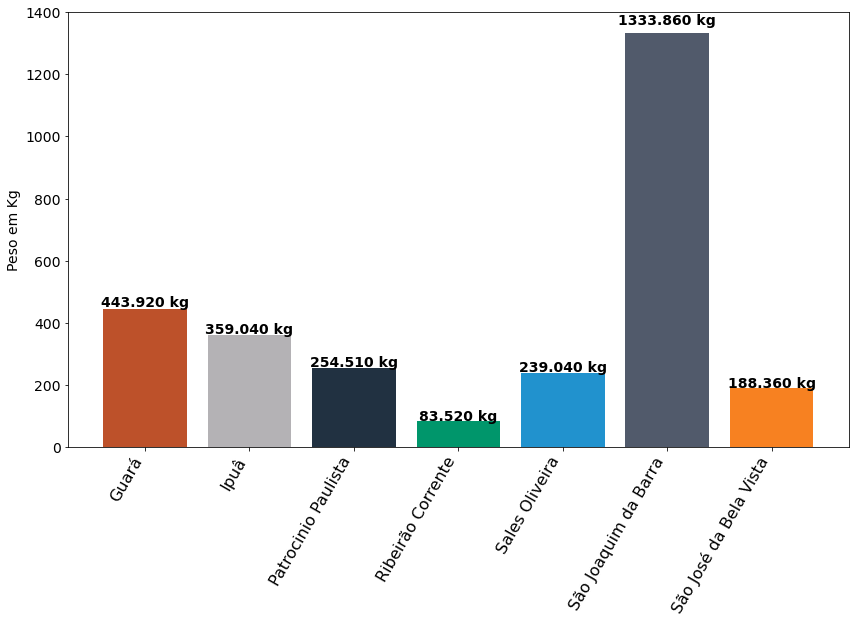

In [170]:
fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']
colors_rsu = ['#BD512A', '#B4B2B5', '#213141', '#00966B', '#2192CE', '#515A6B', '#F78121']

# graph = ax.bar(cidades, variavel, width, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
graph = ax.bar(cidades, variavel, color=colors_rsu)
plt.ylabel('Peso em Kg')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             '{:1.3f} kg'.format(variavel[i]),
             color='black',
             ha='center',
             weight='bold')
    i+=1

#            '{:1.2f}%'.format(v/variavel[i]*100)

plt.savefig('imagens/graficos/grafico-pet-bar-kg-topo.png', dpi=600, bbox_inches='tight')


plt.show()

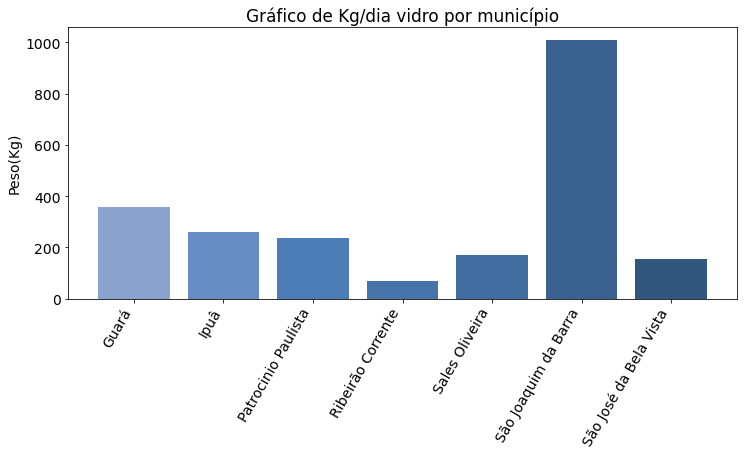

In [125]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Kg/dia vidro por município')
ax.set_ylabel('Peso(Kg)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/graficos/grafico-vidro-bar-normal.png', dpi=600, bbox_inches='tight')

plt.show()

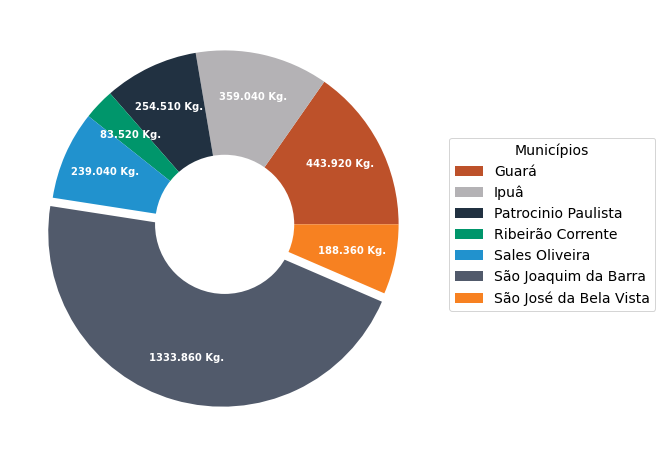

In [171]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="w"),
                                  colors=colors_rsu,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-vidros-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

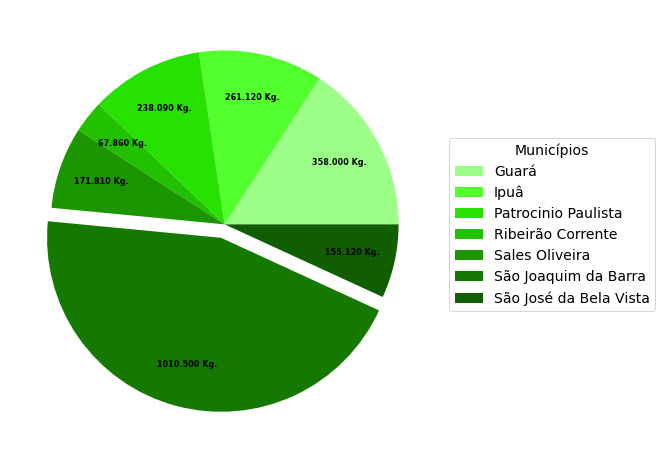

In [127]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/graficos/grafico-vidro-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

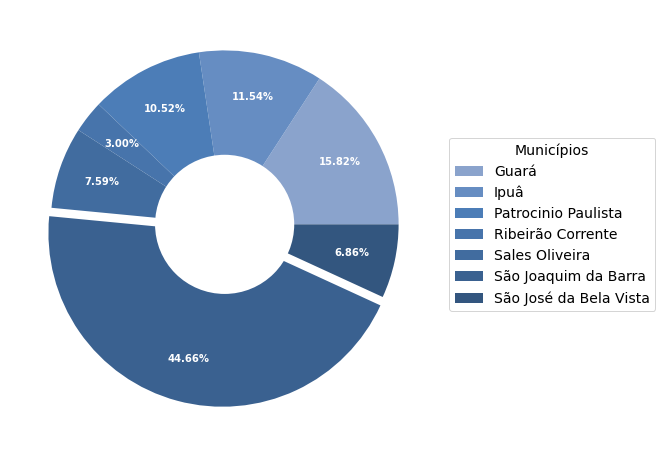

In [128]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct='%1.2f%%', 
                                  pctdistance=0.75,
                                  textprops=dict(color="w"),
                                  colors=colors_blue,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-vidros-rosca-porcentagem-blue.png', dpi=600, bbox_inches='tight')

plt.show()

## C) Total de Materiais Por Município - Pet

In [129]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["PET"].sum() * 100)) / 100
cidades = df["Cidade"]

In [130]:
variavel

Cidade
Guará                     272.08
Ipuâ                      239.36
Patrocinio Paulista       164.20
Ribeirão Corrente          57.42
Sales Oliveira            156.87
São Joaquim da Barra      889.24
São José da Bela Vista    121.88
dtype: float64

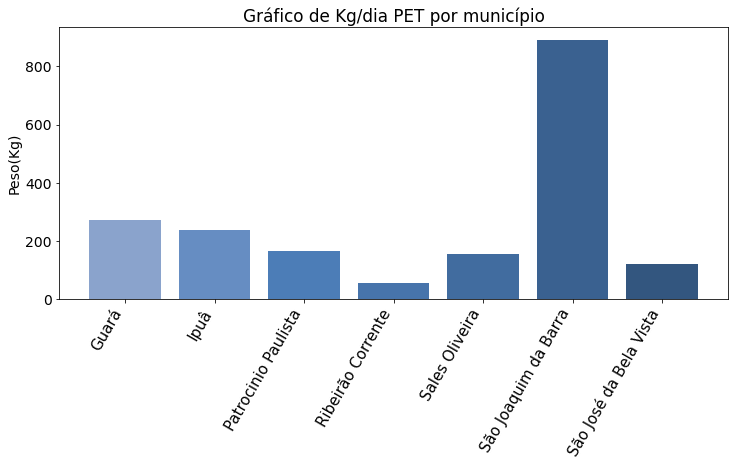

In [131]:
fig, ax = plt.subplots(figsize=(12, 5))

cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Kg/dia PET por município')
ax.set_ylabel('Peso(Kg)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=15,
         horizontalalignment='right')

plt.savefig('imagens/graficos/toneladas-pet.png', dpi=600, bbox_inches='tight')
plt.show()

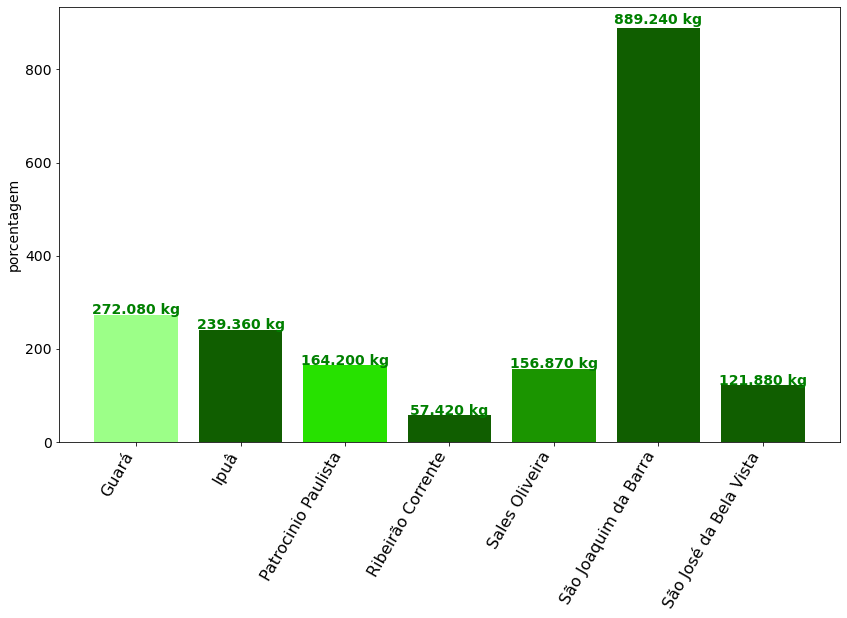

In [132]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/graficos/toneladas-pet-bar-green.png', dpi=600, bbox_inches='tight')


plt.show()

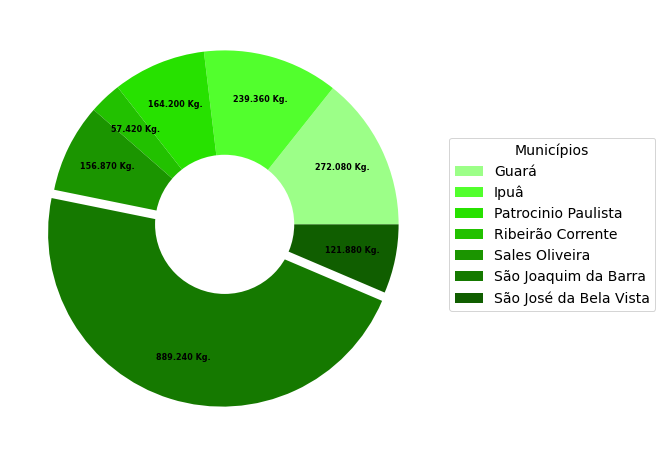

In [133]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-pet-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

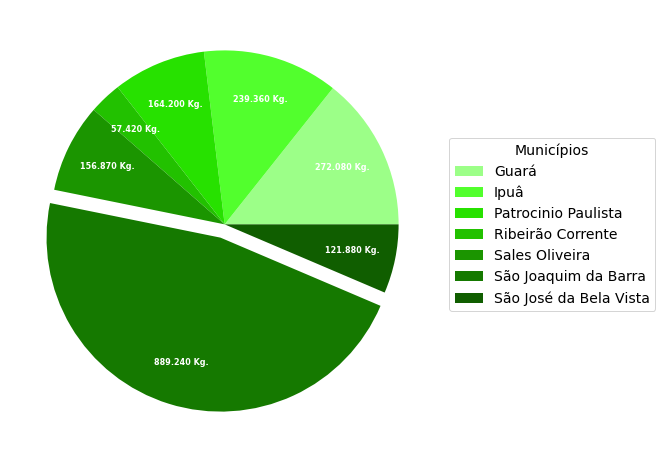

In [134]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="w")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/graficos/grafico-pet-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## D) Total de Materiais Por Município - PVC

In [135]:
#PVC por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["PVC"].sum() * 100)) / 100
cidades = df["Cidade"]

In [136]:
variavel

Cidade
Guará                      85.92
Ipuâ                       65.28
Patrocinio Paulista        41.05
Ribeirão Corrente          13.05
Sales Oliveira             37.35
São Joaquim da Barra      202.10
São José da Bela Vista     27.70
dtype: float64

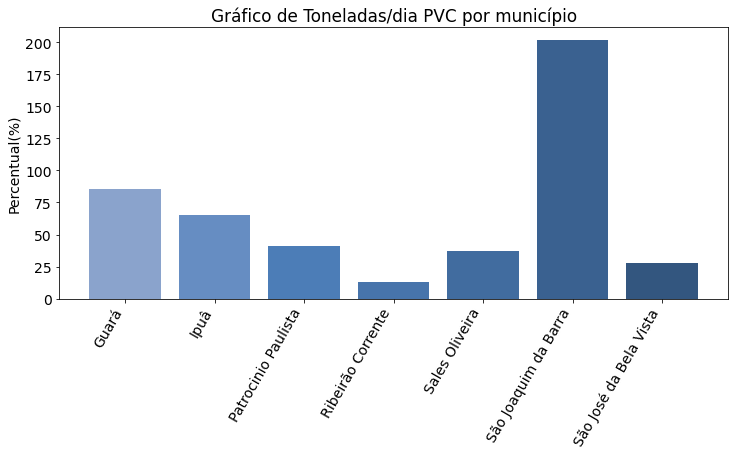

In [137]:
fig, ax = plt.subplots(figsize=(12, 5))

cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia PVC por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')
plt.savefig('imagens/graficos/grafico-pvc-bar-normal.png', dpi=600, bbox_inches='tight')
plt.show()

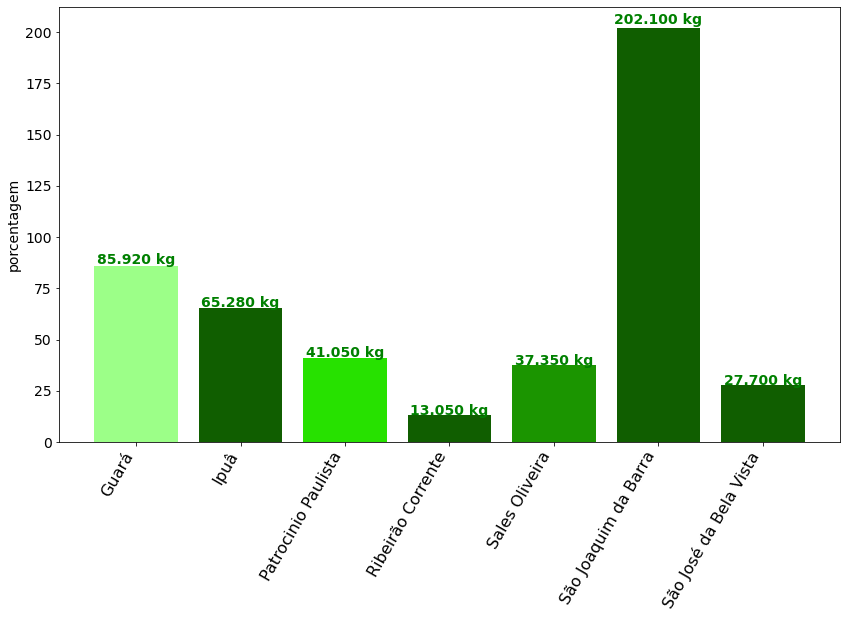

In [138]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/graficos/grafico-pvc-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

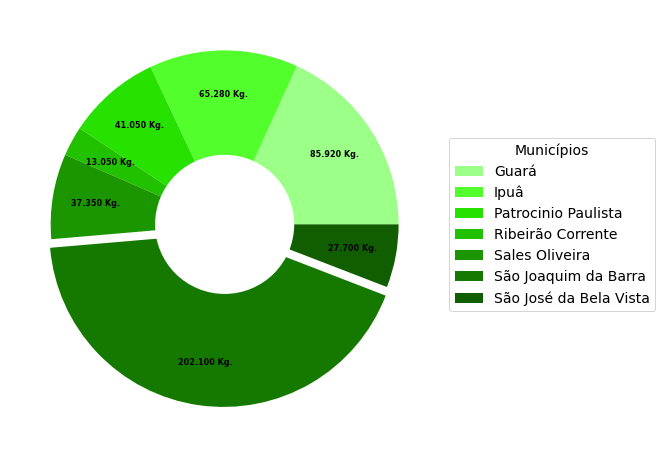

In [139]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-pvc-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

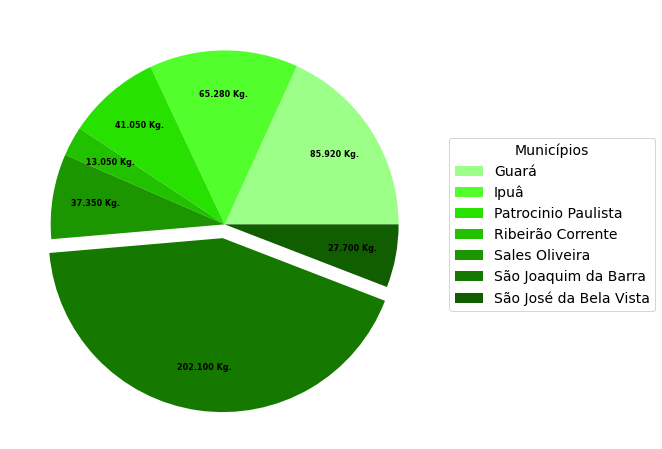

In [140]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/graficos/grafico-pvc-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## E) Total de Materiais Por Município - Isopor

In [141]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Isopor"].sum() * 100)) / 100
cidades = df["Cidade"]

In [142]:
variavel

Cidade
Guará                     171.84
Ipuâ                       87.04
Patrocinio Paulista        65.68
Ribeirão Corrente          20.88
Sales Oliveira             52.29
São Joaquim da Barra      363.78
São José da Bela Vista     44.32
dtype: float64

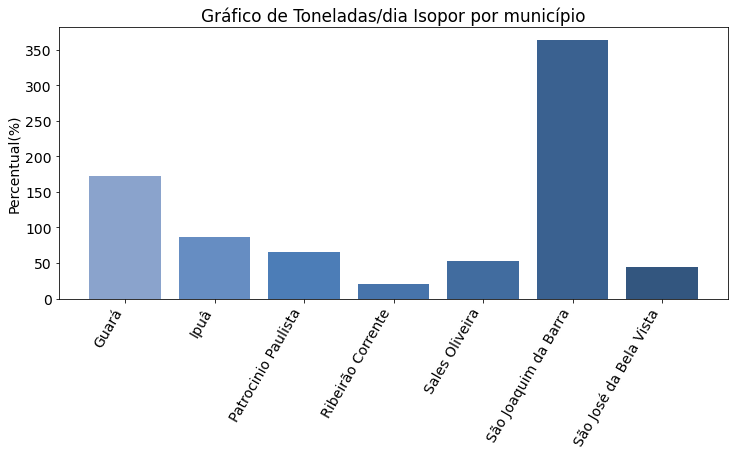

In [143]:
fig, ax = plt.subplots(figsize=(12, 5))

cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia Isopor por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/graficos/grafico-bar-isopor.png', dpi=600, bbox_inches='tight')
plt.show()

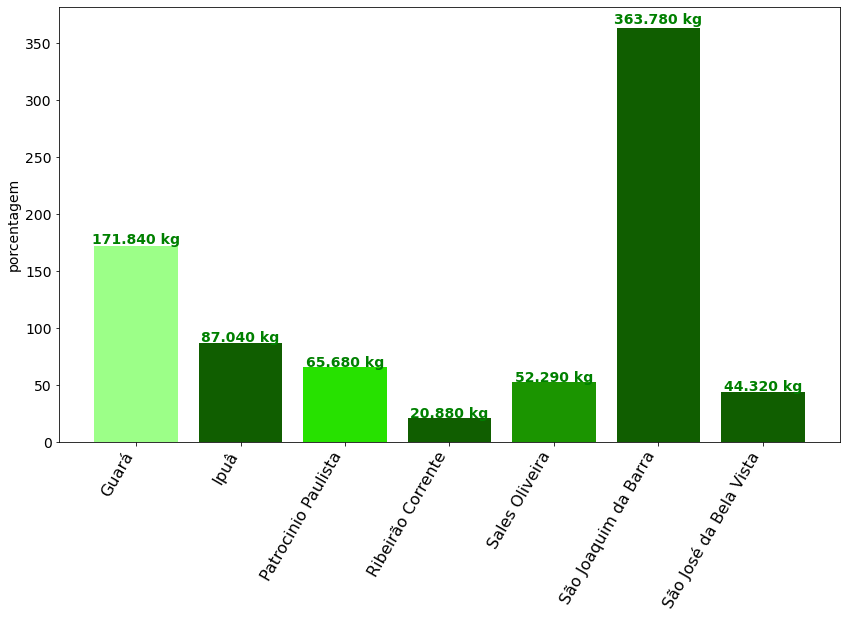

In [144]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/graficos/grafico-isopor-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

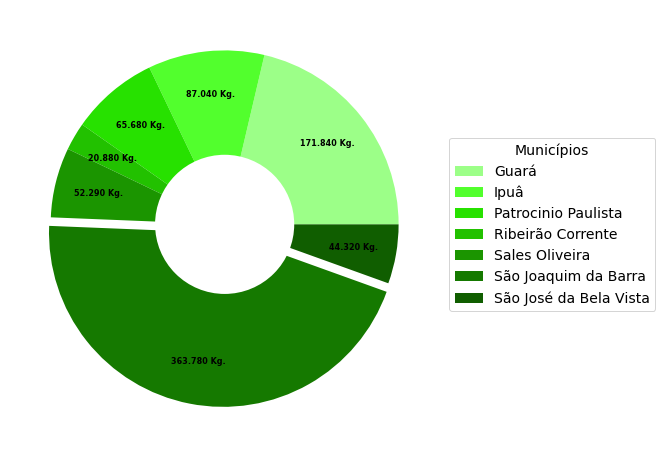

In [145]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-isopor-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

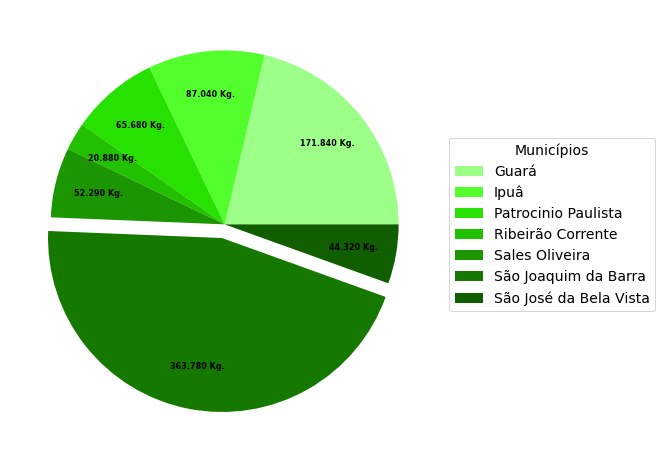

In [146]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/graficos/grafico-isopor-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## F) Total de Materiais Por Município - Metais

In [147]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Metais ferrosos"].sum() * 100)) / 100
cidades = df["Cidade"]

In [148]:
variavel

Cidade
Guará                     186.16
Ipuâ                      152.32
Patrocinio Paulista       114.94
Ribeirão Corrente          31.32
Sales Oliveira            119.52
São Joaquim da Barra      444.62
São José da Bela Vista     77.56
dtype: float64

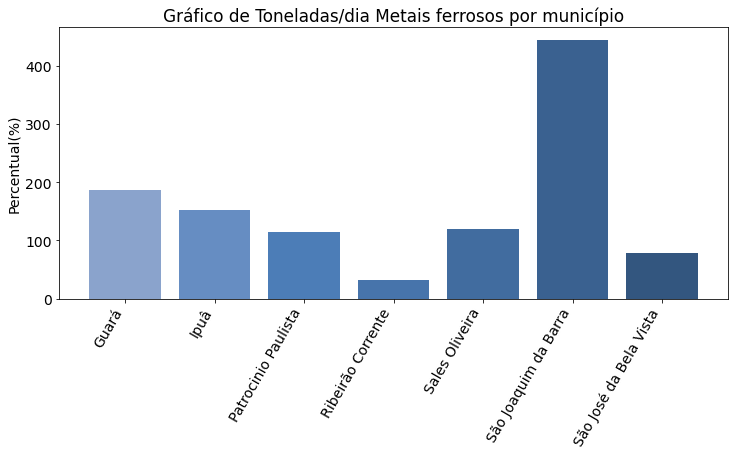

In [149]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia Metais ferrosos por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/graficos/toneladas-metais-ferrosos.png', dpi=600, bbox_inches='tight')
plt.show()

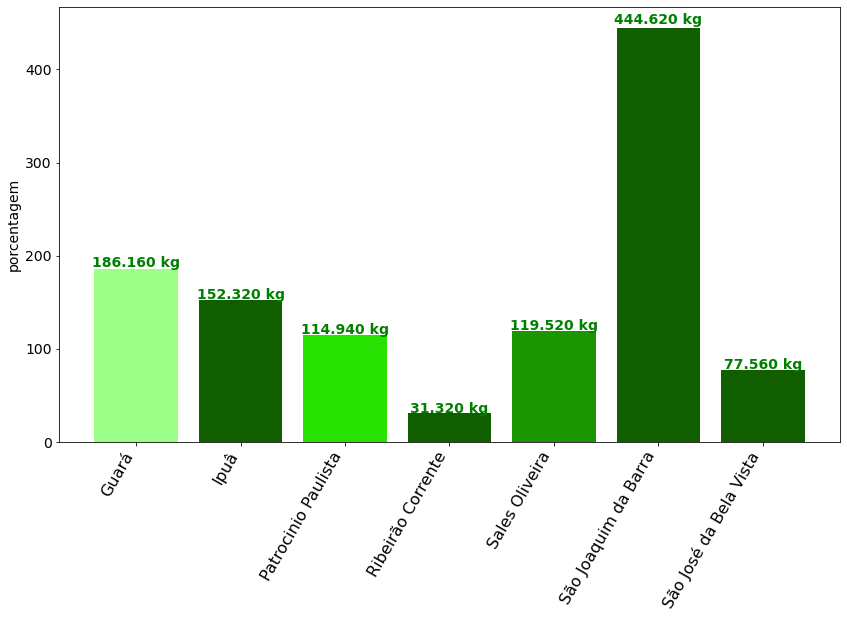

In [150]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/graficos/grafico-metais-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

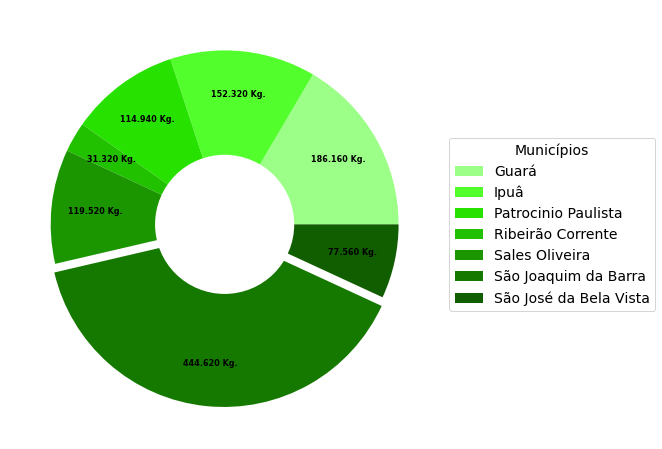

In [151]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-metais-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

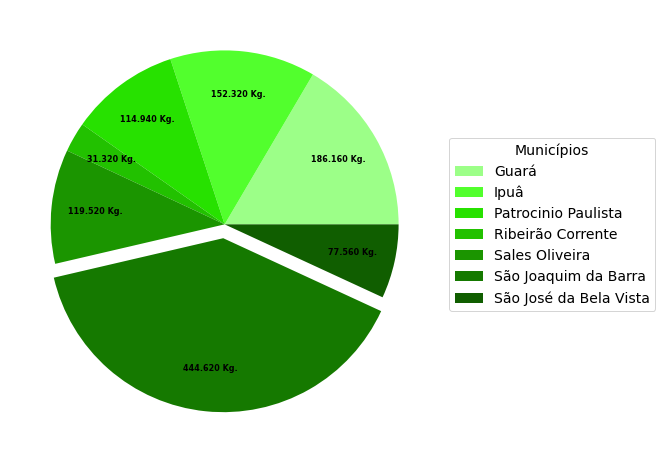

In [152]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/graficos/grafico-metais-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## G) Total de Materiais Por Município - Aluminio

In [153]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Alumínio"].sum() * 100)) / 100
cidades = df["Cidade"]

In [154]:
variavel

Cidade
Guará                      85.92
Ipuâ                       54.40
Patrocinio Paulista        57.47
Ribeirão Corrente          13.05
Sales Oliveira             29.88
São Joaquim da Barra      282.94
São José da Bela Vista     38.78
dtype: float64

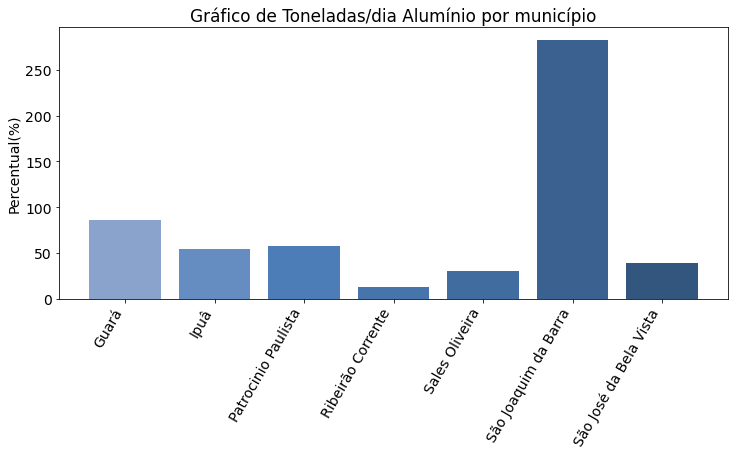

In [155]:
fig, ax = plt.subplots(figsize=(12, 5))

cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia Alumínio por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/graficos/grafico-aluminio-bar-normal.png', dpi=600, bbox_inches='tight')
plt.show()

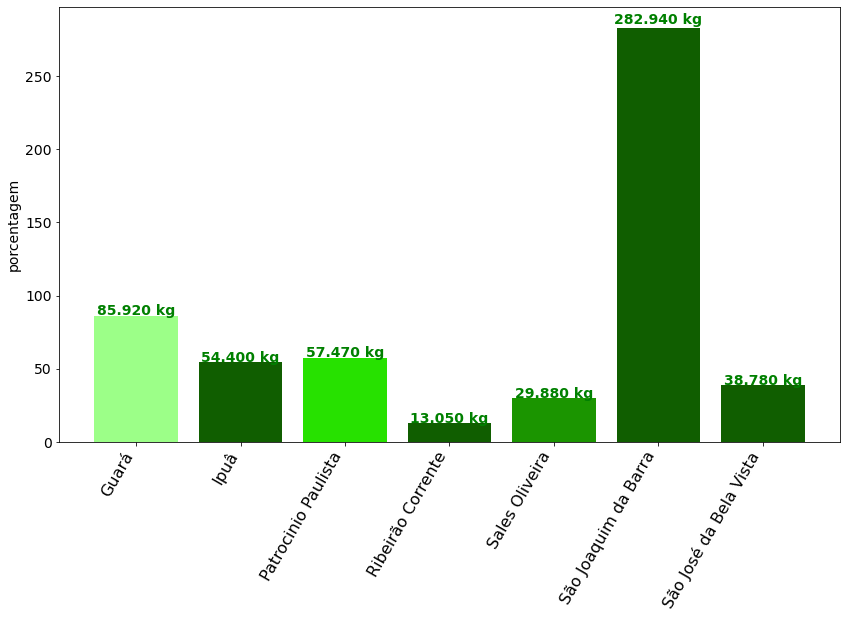

In [156]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/graficos/grafico-aluminio-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

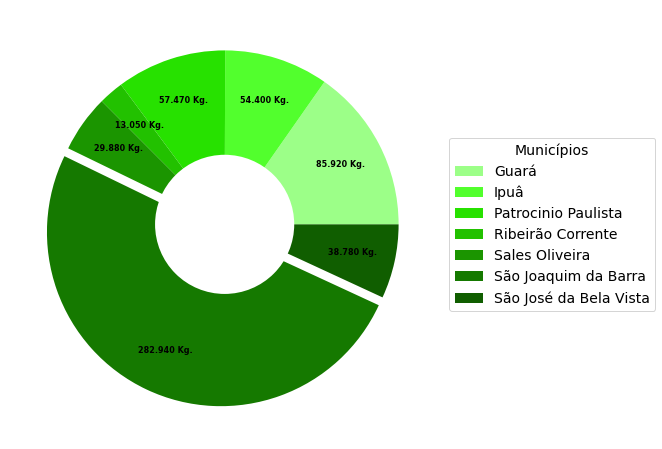

In [157]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-aluminio-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

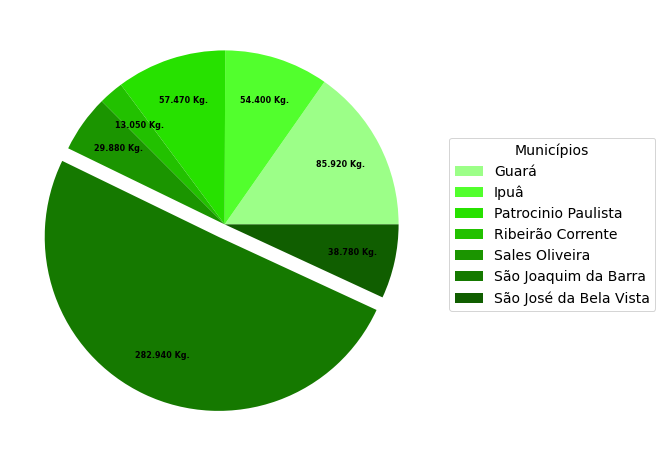

In [158]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/graficos/grafico-aluminio-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## H) Total de Materiais Por Município - Papel Branco

In [159]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Papel branco"].sum() * 100)) / 100
cidades = df["Cidade"]

In [160]:
variavel

Cidade
Guará                      443.92
Ipuâ                       359.04
Patrocinio Paulista        254.51
Ribeirão Corrente           83.52
Sales Oliveira             239.04
São Joaquim da Barra      1333.86
São José da Bela Vista     188.36
dtype: float64

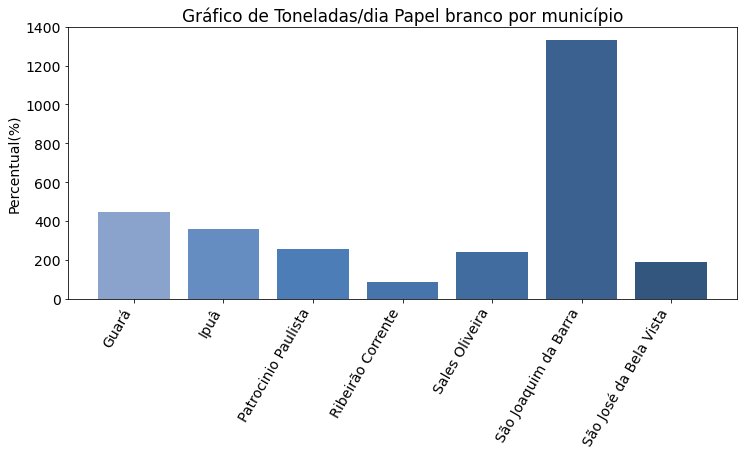

In [161]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia Papel branco por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/graficos/grafico-papel-branco-bar-normal.png', dpi=600, bbox_inches='tight')
plt.show()

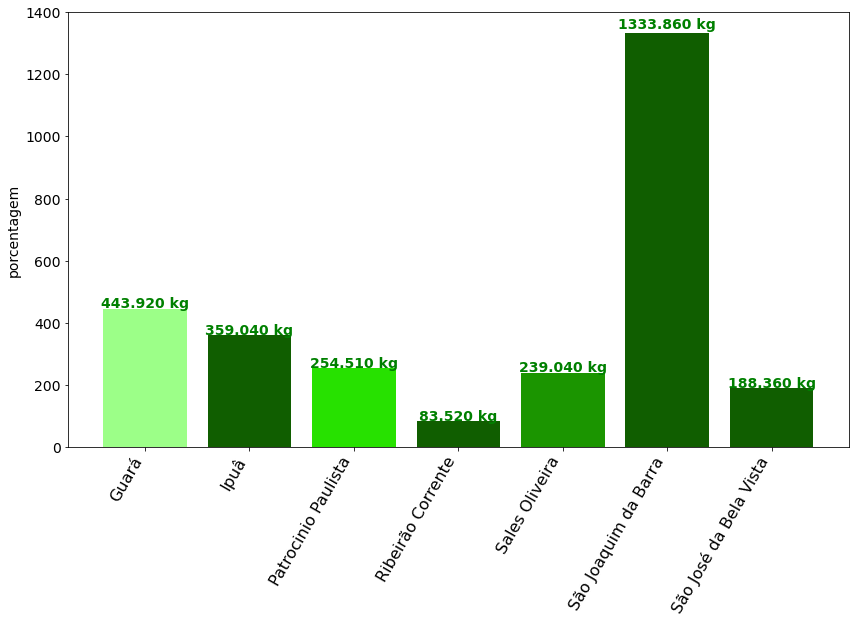

In [162]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/graficos/grafico-papel-branco-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

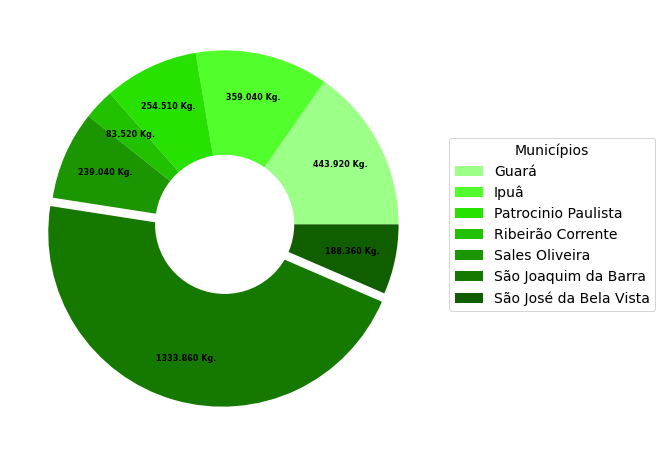

In [163]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/graficos/grafico-papel-branco-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

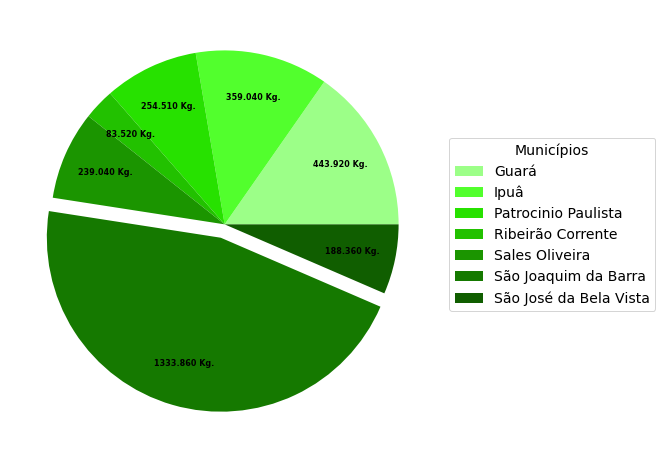

In [164]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/graficos/grafico-papel-branco-pizza.png', dpi=600, bbox_inches='tight')

plt.show()